In [1]:
# 6. Plot volume
import numpy as np
import pyvista as pv

pv.set_jupyter_backend("html")

pred_3d = np.load("/home/tommytang111/gap-junction-segmentation/outputs/volumetric_results/unet_h1qrqboc/sem_dauer_2_s000-972/volume_downsampled.npy")
pred_3d_ = np.transpose(pred_3d, (2, 1, 0))
pred_3d[pred_3d >= 128] = 255
pred_3d[pred_3d < 128] = 0

# wrap into a pyvista UniformGrid
grid = pv.wrap(pred_3d)
contour = grid.contour(isosurfaces=[255])

# Volume rendering (interactive)
p = pv.Plotter(notebook=True)
p.add_mesh(contour, color="#02EBFC", show_scalar_bar=False)
p.set_background("black")
p.camera_position = "iso"
p.enable_eye_dome_lighting()        
p.show_axes()                         
p.export_html("SEM_Dauer_2.html")
p.show()

EmbeddableWidget(value='<iframe srcdoc="<!DOCTYPE html>\n<html>\n  <head>\n    <meta http-equiv=&quot;Content-…

In [8]:
pred_3d[pred_3d >= 128] = 255
pred_3d[pred_3d < 128] = 0

In [9]:
np.unique(pred_3d)  # check unique values in the prediction

array([  0, 255], dtype=uint8)

In [1]:
import os
import cv2
img1 = cv2.imread("/home/tommytang111/gap-junction-segmentation/data/sem_adult/SEM_full/s000-699/SEM_adult_image_export_s000.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/home/tommytang111/gap-junction-segmentation/outputs/assembled_results/unet_8jkuifab/sem_adult_s000-699/SEM_adult_image_export_s000_pred.png", cv2.IMREAD_GRAYSCALE)
print(img1.shape, img2.shape)


(7000, 10500) (7000, 10500)


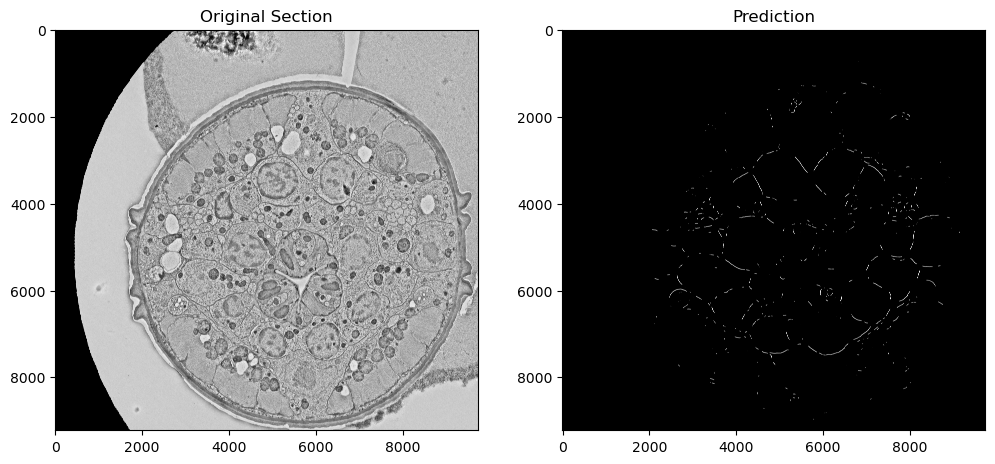

In [5]:
import matplotlib.pyplot as plt

section_path = "/mnt/e/Tommy/SEM_dauer_1_sections/SEM_dauer_1_export_s000.png"
prediction_path = "/home/tommytang111/gap-junction-segmentation/outputs/assembled_results/unet_h1qrqboc/sem_dauer_1_s000-850/SEM_dauer_1_export_s000_pred.png"

section = cv2.imread(section_path, cv2.IMREAD_GRAYSCALE)
prediction = cv2.imread(prediction_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original Section")
plt.imshow(section, cmap='gray')
plt.subplot(122)
plt.title("Prediction")
plt.imshow(prediction, cmap='gray')
plt.show()

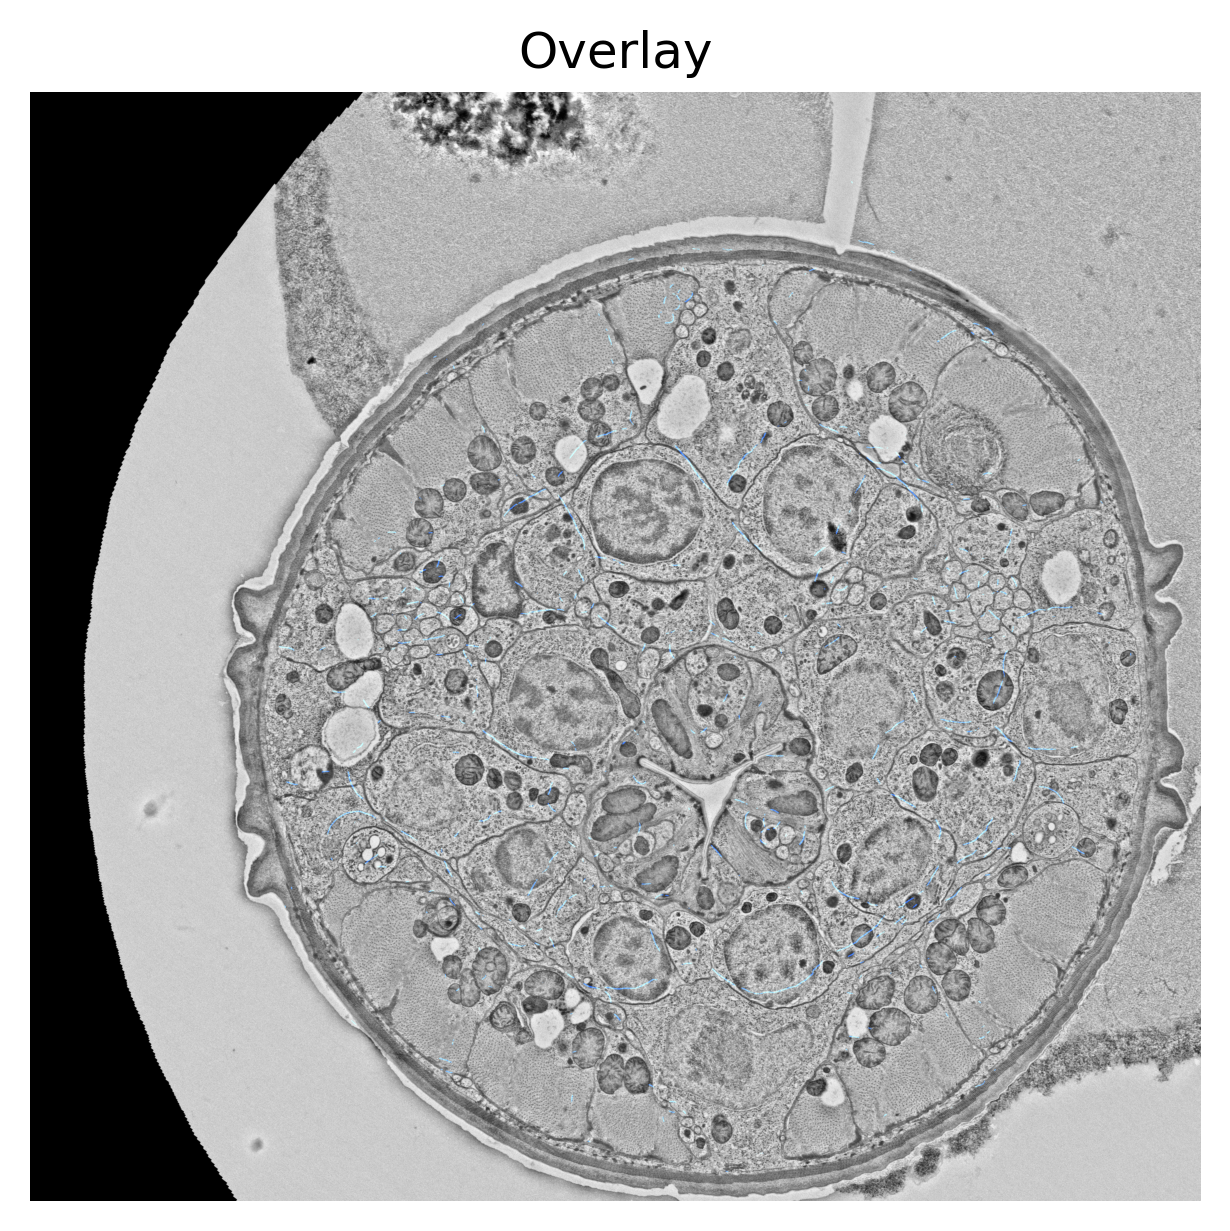

In [11]:
pred2 = cv2.cvtColor(prediction, cv2.COLOR_GRAY2BGR)
pred2[prediction == 255] = [0, 60, 255] #Blue
pred_overlay = cv2.addWeighted(cv2.cvtColor(section, cv2.COLOR_GRAY2BGR), 1, pred2, 1, 0)
plt.figure(dpi=300)
plt.imshow(pred_overlay)
plt.title("Overlay")
plt.axis('off')
plt.show()

In [8]:
pred2.shape

(9216, 9728, 3)

In [9]:
section.shape

(9216, 9728)

In [2]:
import sys
import numpy as np
sys.path.insert(0, '/home/tommytang111/gap-junction-segmentation/code/src')
from utils import split_img

In [3]:
some_section = np.zeros((1000, 1000))  # Example large image
images, names, sizes = split_img(some_section, tile_size=512, overlap=True, names=True, xysizes=True)


In [4]:
for name, img in zip(names, images):
    print(name, img.shape)

Y0_X0 (512, 512)
Y0_X1 (512, 512)
Y0_X2 (512, 512)
Y0_X3 (512, 360)
Y0_X4 (512, 104)
Y1_X0 (512, 512)
Y1_X1 (512, 512)
Y1_X2 (512, 512)
Y1_X3 (512, 360)
Y1_X4 (512, 104)
Y2_X0 (512, 512)
Y2_X1 (512, 512)
Y2_X2 (512, 512)
Y2_X3 (512, 360)
Y2_X4 (512, 104)
Y3_X0 (360, 512)
Y3_X1 (360, 512)
Y3_X2 (360, 512)
Y3_X3 (360, 360)
Y3_X4 (360, 104)
Y4_X0 (104, 512)
Y4_X1 (104, 512)
Y4_X2 (104, 512)
Y4_X3 (104, 360)
Y4_X4 (104, 104)


In [8]:
sizes

[5, 5]